# EarthCam Data Science Candidate Assignment - Model Training
### Predicting Weather Data in Joliet, IL in 2024

For simplicity's sake, we'll use Facebook's open source Prophet time series forecasting tool

In [13]:
import pandas as pd
import numpy as np
from prophet import Prophet
from google.colab import files
import io

In [47]:
import os
import platform

In [48]:
os.name
platform.system()

'Linux'

In [14]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



In [ ]:
### commented out the below on Google Colab
# weather_data = pd.read_csv("model_data.csv")

In [7]:
weather_data = files.upload()
model_data = pd.read_csv(io.BytesIO(weather_data['model_data.csv']))

Saving model_data.csv to model_data.csv


In [19]:
model_data.sample(3)

,ObservationDateTime,Temperature(F),Pressure(mb),PrecipDay(in),PrecipYr(in),WindSpeed(mph),WindDirection_West,WindDirection_South,WindDirection_East,RelativeHumidity,Visibility(mi),Conditions_Scattered,Conditions_Overcast Sky,Conditions_Low Visibility,Conditions_Broken Sky,Month_Jan,Month_Feb,Month_Mar,Month_Apr,Month_May,Month_Jue,Month_Jul,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec
6513,2022-10-12 10:35:00+00:00,63.0,1008.81,0.01,9.68,13.8,0.0,1.0,0.0,0.775,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7088,2023-03-04 03:35:00+00:00,37.0,1005.08,0.00,3.02,4.6,0.0,0.0,0.0,0.753,10.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5360,2021-12-31 05:55:00+00:00,37.0,1010.16,0.00,0.04,4.6,1.0,0.0,0.0,0.809,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Tragically, we can't use most of our cleaned data, as Prophet input data is strictly limited to two columns, a pandas datestamp "ds" column and a "y" column containing the measurement to be forecasted.

I would absolutely sometime love to figure out a way to incorporate the other features into a model of our own creation (impute the other features based on historical data, aggregate and average all 5 years' worth of data into a "dummy year" and base our predictions off of that?)
  

For now, let's create a dataframe that is compatible with Prophet

In [21]:
new_datetimes = [pd.Timestamp(dt[:10]) for dt in model_data["ObservationDateTime"]]

In [22]:
new_datetimes[:4]

[Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-05-02 00:00:00')]

In [23]:
model_data["ObservationDateTime"] = pd.DataFrame(new_datetimes)

Since we need to keep regular time intervals in time series data, we'll extract only one row per date, as most dates have multiple row entries

In [25]:
model_data = model_data.drop_duplicates("ObservationDateTime")
prophet_data = model_data[model_data.columns[0:2]]
prophet_data


,ObservationDateTime,Temperature(F)
0,2018-05-01,55.0
3,2018-05-02,73.0
7,2018-05-03,75.0
11,2018-05-04,68.0
15,2018-05-05,61.0
...,...,...
7307,2023-05-01,43.0
7311,2023-05-02,50.0
7315,2023-05-03,48.0
7319,2023-05-04,48.0


In [26]:
prophet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1814 entries, 0 to 7323
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ObservationDateTime  1814 non-null   datetime64[ns]
 1   Temperature(F)       1814 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 42.5 KB


Let's rename these columns to match Prophet's input requirements and we're ready!

In [27]:
prophet_data.rename(columns={"ObservationDateTime": "ds", "Temperature(F)" : "y"},inplace=True)

<ipython-input-27-702bdd206ae5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_data.rename(columns={"ObservationDateTime": "ds", "Temperature(F)" : "y"},inplace=True)


In [28]:
prophet_data.sample(3)

,ds,y
343,2018-07-25,73.0
3179,2020-07-11,73.0
6248,2022-08-08,77.0


Let's fit a prophet instance over our data

In [29]:
m = Prophet()
m.fit(prophet_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfk0dyue6/a5_it847.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfk0dyue6/uj9g44ep.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28931', 'data', 'file=/tmp/tmpfk0dyue6/a5_it847.json', 'init=/tmp/tmpfk0dyue6/uj9g44ep.json', 'output', 'file=/tmp/tmpfk0dyue6/prophet_model3n1yyo6a/prophet_model-20230810011022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:10:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:10:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [39]:
future = m.make_future_dataframe(periods=606)
# let's get right to the end of 2024
future.tail()

,ds
2415,2024-12-27
2416,2024-12-28
2417,2024-12-29
2418,2024-12-30
2419,2024-12-31


In [40]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-01,49.721320,37.939188,62.153469,49.721320,49.721320,0.575475,0.575475,0.575475,0.006714,0.006714,0.006714,0.568761,0.568761,0.568761,0.0,0.0,0.0,50.296795
1,2018-05-02,49.718621,40.154446,63.938121,49.718621,49.718621,1.803822,1.803822,1.803822,0.859279,0.859279,0.859279,0.944543,0.944543,0.944543,0.0,0.0,0.0,51.522442
2,2018-05-03,49.715922,40.418654,64.614050,49.715922,49.715922,2.337545,2.337545,2.337545,0.979476,0.979476,0.979476,1.358069,1.358069,1.358069,0.0,0.0,0.0,52.053467
3,2018-05-04,49.713222,38.645430,62.502460,49.713222,49.713222,1.412717,1.412717,1.412717,-0.395657,-0.395657,-0.395657,1.808374,1.808374,1.808374,0.0,0.0,0.0,51.125939
4,2018-05-05,49.710523,39.806271,62.187260,49.710523,49.710523,0.854862,0.854862,0.854862,-1.439065,-1.439065,-1.439065,2.293927,2.293927,2.293927,0.0,0.0,0.0,50.565385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2024-12-27,51.752849,21.344468,45.045854,51.455005,52.028619,-18.402638,-18.402638,-18.402638,-0.395657,-0.395657,-0.395657,-18.006981,-18.006981,-18.006981,0.0,0.0,0.0,33.350210
2416,2024-12-28,51.754240,20.417402,43.432098,51.455637,52.030259,-19.472227,-19.472227,-19.472227,-1.439065,-1.439065,-1.439065,-18.033162,-18.033162,-18.033162,0.0,0.0,0.0,32.282013
2417,2024-12-29,51.755631,22.905144,45.557931,51.456279,52.032288,-17.931080,-17.931080,-17.931080,0.134334,0.134334,0.134334,-18.065413,-18.065413,-18.065413,0.0,0.0,0.0,33.824551
2418,2024-12-30,51.757021,21.758515,44.763003,51.456921,52.034513,-18.251318,-18.251318,-18.251318,-0.145079,-0.145079,-0.145079,-18.106238,-18.106238,-18.106238,0.0,0.0,0.0,33.505704


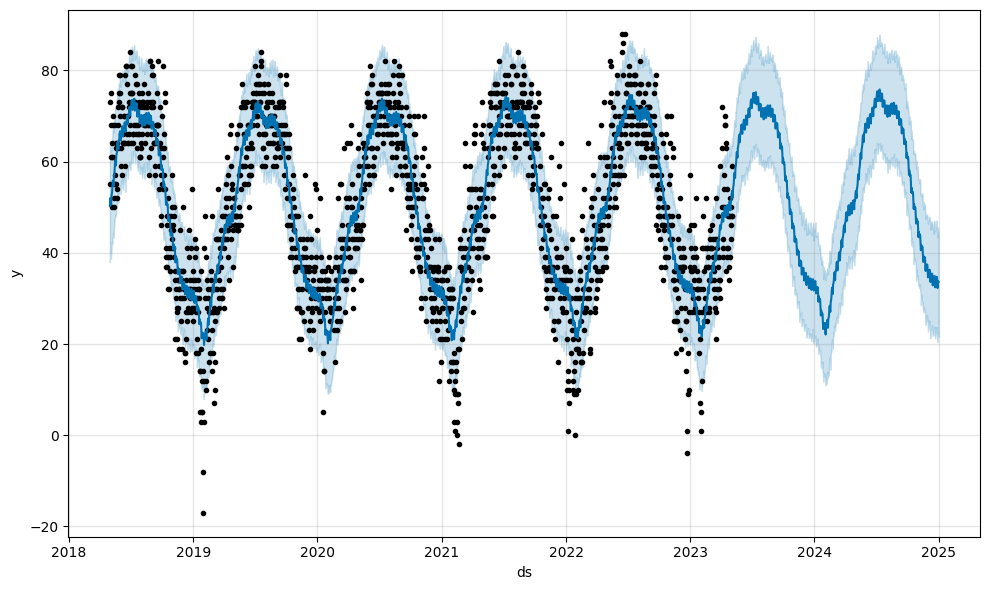

In [41]:
plotted_temps = m.plot(forecast)

In [44]:
forecast.to_csv("forecast2024.csv",index=False)